In [161]:
"""Computes recombination rate
"""

import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

class DustDr(object):
    """Class to read dust extinction, scattering, and absorption
    properties computed for carbonaceous-silicate model for
    interstellar dust with R_V=3.1 (Draine 2003)
    
    https://www.astro.princeton.edu/~draine/dust/dustmix.html
    """
    
    def __init__(self):
        # read data

        local = os.path.dirname(os.path.realpath('__file__'))
        
        # Milky Way exctinction
        self.fname_Rv31 = os.path.join(local, '../data/kext_albedo_WD_MW_3.1A_60_D03.dat')
        self.fname_Rv40 = os.path.join(local, '../data/kext_albedo_WD_MW_4.0A_40_D03.dat')
        self.fname_Rv55 = os.path.join(local, '../data/kext_albedo_WD_MW_5.5A_30_D03.dat')

        self.GTD = {'Rv31':1.236e2,
                    'Rv40':1.174e2,
                    'Rv55':1.051e2}
        
        self.dfa = dict()
        self.dfa['Rv31'] = self._read_data(self.fname_Rv31, self.GTD['Rv31'])
        self.dfa['Rv40'] = self._read_data(self.fname_Rv40, self.GTD['Rv40'])
        self.dfa['Rv55'] = self._read_data(self.fname_Rv55, self.GTD['Rv55'])

    @staticmethod
    def _read_data(fname, GTD):
        
        # Read dielectronic recombination rate data
        with open(fname, 'r') as fp:
            lines = fp.readlines()
        
        nline = len(lines)
        lmum = np.zeros(nline,)
        albedo = np.zeros(nline,)
        cos = np.zeros(nline,)
        Cext = np.zeros(nline,)
        kappa_abs = np.zeros(nline,)
        cossq = np.zeros(nline,)
        
        # Get maximum string length of comments
        maxlen = 0
        for i, line in enumerate(lines):
            l = line.split()
            if len(l[6:]) != 0:
                maxlen = max(maxlen, len(' '.join(l[6:])))
        comment = np.chararray(nline, itemsize=maxlen)
        
        for i, line in enumerate(lines):
            l = line.split()
            lmum[i] = float(l[0])
            albedo[i] = float(l[1])
            cos[i] = float(l[2])
            Cext[i] = float(l[3])
            kappa_abs[i] = float(l[4])
            cossq[i] = float(l[5])
            if len(l[6:]) != 0:
                comment[i] = ' '.join(l[6:])
            else:
                comment[i] = ''

        df = pd.DataFrame({'lmum':lmum, 'albedo':albedo, 'cos':cos,
                                'Cext':Cext, 'K_abs':kappa_abs, 'cossq':cossq,
                                'comment':comment})

        df['lAA'] = df['lmum']*1e4
        df['kappa_abs'] = df['K_abs']/GTD
        
        return df

Text(0.5, 0, 'wavelength $[\\AA]$')

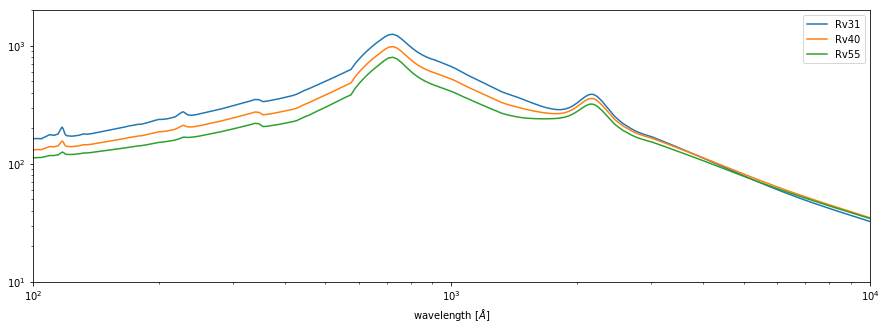

In [163]:
d = DustDr()
fig, axes = plt.subplots(figsize=(15, 5))
for k, df in d.dfa.items():
    plt.loglog(df.lAA, df.kappa_abs, label=k)
plt.legend()
plt.xlim(1e2,1e4)
plt.ylim(1e1,2e3)
plt.xlabel('wavelength ' + r'$[\AA]$')